# 1.梯度縮減(Gradient Descent)

**以y = x^2的範例，說明深度學習網路如何透過可微分之函數逼近目標最小值**

[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


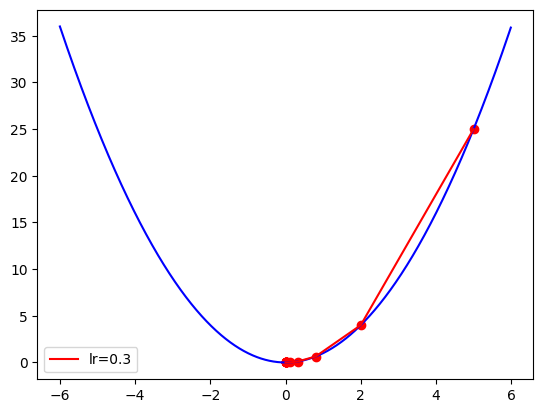

In [3]:
#--------------------------------------------------------套件引入
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
#--------------------------------------------------------建立函數
# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點
        :param df: 目標函數的一階導函數
        :param epochs: 反覆運算週期
        :param lr: 學習率
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1
     """
    xs = np.zeros(epochs+1)
    x = x_start
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        # v表示x要改變的幅度
        v = - dx * lr
        x += v
        xs[i+1] = x
    return xs

#--------------------------------------------------------Main

x_start = 5 # 起始權重
epochs = 15 # 執行週期數
lr = 0.3  # 學習率
x = GD(x_start, dfunc, epochs, lr=lr) # 梯度下降法

print (x) # 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'
#plt.plot(line_x, line_y, c='b')
t = arange(-6.0, 6.0, 0.01)  # X軸範圍

plt.plot(t, func(t), c='b') #藍線標註
plt.plot(x, func(x), c=color, label='lr={}'.format(lr)) #用紅線標註學習率
plt.scatter(x, func(x), c=color, ) #紅線標點
plt.legend()

plt.show()

# 2.Keras深度學習初體驗1
**利用keras套件，產生一個32個神經元的深度學習模型進行訓練**

In [4]:
#--------------------------------------------------------套件引入
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
#--------------------------------------------------------Main
data = np.random.random((1000, 10))       # 隨機產生1000筆資料，每筆資料包含十個float數字
labels = np.random.randint(2, size=(1000, 1)) # 隨機產生1000筆資料，每筆資料上限為2(意思就是0 或 1)

print(np.shape(data))# 顯示 data　資料
print(data[0])    # 顯示 data　第一筆資料內容
print(np.shape(labels))# 顯示 labels　資料
print(labels[0])    # 顯示 labels　第一筆資料內容

#--------------------------------------------------------模型設定
model = Sequential()                    # 以堆疊的方式建立
model.add(Dense(32, activation='relu', input_dim=10))   # 全連結 神經元32 激活函數relu 輸入參數 10
model.add(Dense(1, activation='sigmoid'))          # 全連結 輸出參數 1 激活函數sigmoid
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) # 優化器 rmsprop 損失函數 binary_crossentropy 性能指標: 準確率

model.fit(data, labels, epochs=10, batch_size=32) # 模型訓練設定 10回合 每回合使用32個參數

score=model.evaluate(data, labels) #評分
print(score[1]) #顯示最後評分

(1000, 10)
[0.22846766 0.40550589 0.07679591 0.15136925 0.23084881 0.34394857
 0.20766145 0.51020057 0.68886482 0.13868004]
(1000, 1)
[1]
Epoch 1/10
32/32 [==============================] - 5s 3ms/step - loss: 0.6996 - accuracy: 0.5090
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4970
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5060
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5150
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5080
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5280
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5210
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5340
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6885

# 3.Keras_tutorial2


In [5]:
#--------------------------------------------------------套件引入
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
#--------------------------------------------------------模型設定
model = Sequential()                  # 以堆疊的方式建立
model.add(Dense(512, activation='relu', input_dim=784)) # 全連結 神經元512 激活函數relu 輸入參數 784
model.add(Dropout(0.2))                  # 每回合丟掉20%神經元
model.add(Dense(10, activation='softmax'))        # 全連結 輸出參數10 激活函數softmax
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # 優化器 adam 損失函數 categorical_crossentropy 性能指標: 準確率

#--------------------------------------------------------Main
data = np.random.random((1000, 784))       # 1000筆資料 每筆784個參數
labels = np.random.randint(10, size=(1000, 10)) # 10個標籤, 1000筆資料 每筆10個標籤

model.fit(data, labels, epochs=10, batch_size=32) # 模型訓練設定 10回合 每回合使用32個參數

score=model.evaluate(data, labels) # 評分
print(score[1])           # 顯示最後評分

Epoch 1/10
32/32 [==============================] - 3s 5ms/step - loss: 475.7241 - accuracy: 0.0740
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 1606.1709 - accuracy: 0.0760
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 3027.7583 - accuracy: 0.0770
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 4609.5381 - accuracy: 0.0650
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 6185.3516 - accuracy: 0.0680
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 7617.6304 - accuracy: 0.0780
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 9117.8643 - accuracy: 0.0740
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 10856.5107 - accuracy: 0.0730
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 12239.6133 - accuracy: 0.0600
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 12791.6660 - accu

# 4.keras_CNN_mnist

In [6]:
#--------------------------------------------------------套件引入
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
#--------------------------------------------------------模型設定
model=Sequential()                                          # 以堆疊的方式建立
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))  # 捲積 過濾器16 過濾器大小5*5 輸入圖片大小28*28 激活函數relu
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())                                          # 攤開成一維
model.add(Dense(10, activation='softmax'))                               # 全連結 輸出參數10 激活函數softmax
model.summary()                                             # 顯示摘要
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])       # 優化器 rmsprop 損失函數 categorical_crossentropy 性能指標: 準確率

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                23050     
                                                                 
Total params: 23466 (91.66 KB)
Trainable params: 23466 (91.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 導入手寫辨識資料
nist=keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512) # 模型訓練設定 使用訓練資料、標籤 10回合 每回合使用512個參數

Epoch 1/10
118/118 [==============================] - 5s 5ms/step - loss: 4.7059 - accuracy: 0.8263
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.3454 - accuracy: 0.9541
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1423 - accuracy: 0.9723
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9812
Epoch 5/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9855
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9890
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0325 - accuracy: 0.9908
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0245 - accuracy: 0.9928
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0215 - accuracy: 0.9936
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0177 - accuracy: 0.9946

In [9]:
score=model.evaluate(test_data, test_label) # 評分
print(score[1])                # 顯示評分

313/313 [==============================] - 1s 3ms/step - loss: 0.1227 - accuracy: 0.9820
0.9819999933242798


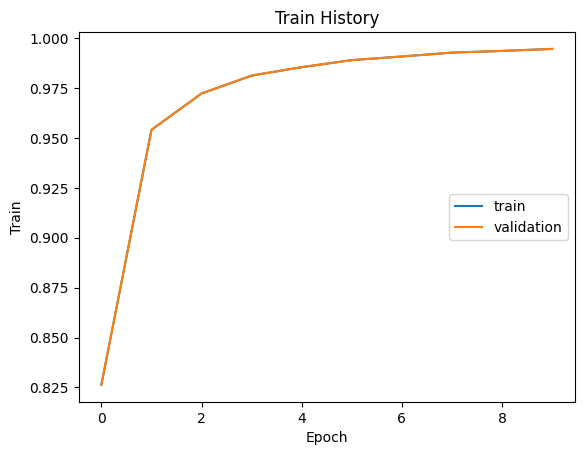

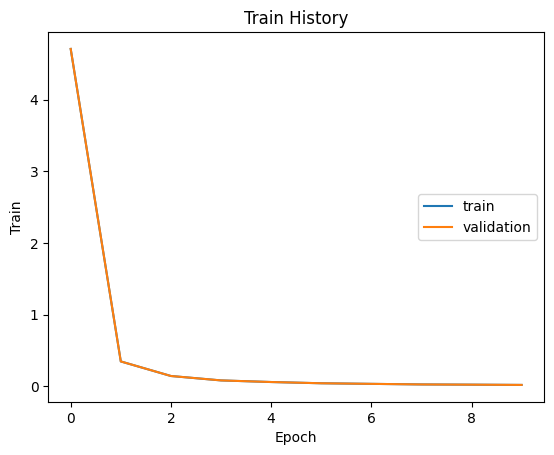

313/313 [==============================] - 1s 2ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,1,2,0,0,0,4,1,1,1
1,1,1125,1,1,0,2,2,0,3,0
2,3,5,1007,0,1,0,4,8,4,0
3,0,0,6,992,0,6,0,2,3,1
4,0,0,0,0,962,0,1,4,2,13
5,2,1,0,9,0,873,2,0,4,1
6,3,2,0,1,2,2,946,0,2,0
7,0,2,4,1,0,0,0,1018,0,3
8,7,0,3,1,3,1,2,2,954,1


In [10]:
#--------------------------------------------------------套件引入
#繪製正確性與損失立歷史圖
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#--------------------------------------------------------建立函數
def show_train_history(train_history, train, validation): # 將訓練過程繪製成曲線圖
    plt.plot(train_history.history[train])          # 訓練資料
    plt.plot(train_history.history[validation])       # 測試資料
    plt.title('Train History')   # 圖表名稱
    plt.ylabel('Train')       # y軸
    plt.xlabel('Epoch')       # x軸
    plt.legend(['train', 'validation'], loc='center right') # 標註線條對應內容 放右邊中間
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
#--------------------------------------------------------將預測內容表格化
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])

# 5.keras_mnist

In [11]:
#--------------------------------------------------------套件引入
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
#--------------------------------------------------------模型設定
model=Sequential()                    # 以堆疊的方式建立
model.add(Flatten())                   # 攤開成一維
model.add(Dense(32, activation='relu', input_dim=784)) # 全連結 神經元32 激活函數relu 輸入參數 784
model.add(Dense(10, activation='sigmoid'))        # 全連結 輸出參數32 激活函數sigmoid
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])# 優化器 rmsprop 損失函數 sparse_categorical_crossentropy 性能指標: 準確率

In [12]:
mnist=keras.datasets.mnist #導入 手寫辨識資料
(train_data, train_label), (test_data, test_label) = mnist.load_data() #導入 訓練資料 測試資料

In [13]:
print(type(train_data))
print(train_data.shape) # 訓練資料 格式
print(type(train_label))
print(train_label.shape)# 訓練資料標籤
print(test_data.shape) # 測試資料 格式
print(test_label.shape)# 測試資料標籤

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
print(train_label[0]) #顯示第一筆訓練標籤
print(train_data[0])  #顯示第一筆訓練資料

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

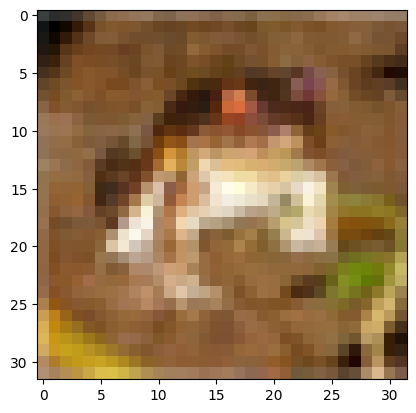

In [30]:
#--------------------------------------------------------套件引入
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='binary')# 顯示第一筆訓練資料 陣列值轉換成顏色
plt.show()

In [16]:
model.fit(train_data,train_label,epochs=20,batch_size=512)# 模型訓練設定 20回合 每回合使用512個參數

Epoch 1/20
118/118 [==============================] - 1s 3ms/step - loss: 13.5538 - accuracy: 0.7223
Epoch 2/20
118/118 [==============================] - 0s 3ms/step - loss: 1.8380 - accuracy: 0.8024
Epoch 3/20
118/118 [==============================] - 0s 3ms/step - loss: 0.7472 - accuracy: 0.8215
Epoch 4/20
118/118 [==============================] - 0s 3ms/step - loss: 0.5164 - accuracy: 0.8752
Epoch 5/20
118/118 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.9022
Epoch 6/20
118/118 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.9177
Epoch 7/20
118/118 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 0.9259
Epoch 8/20
118/118 [==============================] - 0s 3ms/step - loss: 0.2666 - accuracy: 0.9336
Epoch 9/20
118/118 [==============================] - 0s 3ms/step - loss: 0.2454 - accuracy: 0.9377
Epoch 10/20
118/118 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.941

In [17]:
score=model.evaluate(test_data, test_label) # 評分
print(score[1])               # 顯示評分

313/313 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.9449
0.9448999762535095


# 6.keras_CNN_Cifar10

In [18]:
#--------------------------------------------------------套件引入
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
#--------------------------------------------------------模型設定
model=Sequential()                                          # 以堆疊的方式建立
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu')) # 捲積 過濾器64 過濾器大小5*5 輸入圖片大小32*32 顏色參數3 rgb通道 激活函數relu
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))               # 捲積 過濾器64 過濾器大小5*5 激活函數relu
model.add(MaxPooling2D(pool_size=2))                                # 縮減特徵圖尺寸 2*2
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))              # 捲積 過濾器128 過濾器大小5*5 激活函數relu
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))              # 捲積 過濾器128 過濾器大小5*5 激活函數relu
model.add(MaxPooling2D(pool_size=2))                                # 縮減特徵圖尺寸 2*2
model.add(Flatten())                                        # 攤平
model.add(Dense(10, activation='softmax'))                             # 全連結 神經元10 激活函數softmax
model.summary()                                           # 顯示摘要
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])     # 優化器 rmsprop 損失函數 categorical_crossentropy 性能指標: 準確率

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        4864      
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 128)         409728    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                 

In [19]:
#----------------------------------------------------------------------------導入資料
cifar10=keras.datasets.cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
train_label_original=train_label
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

170498071/170498071 [==============================] - 5s 0us/step


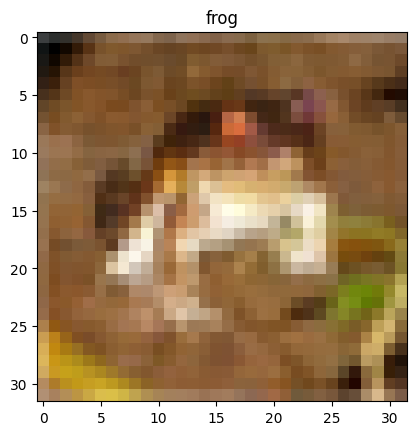

[6]


In [20]:
#--------------------------------------------------------套件引入
import matplotlib.pyplot as plt

category=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] # 建立標籤
plt.imshow(train_data[0])                                 # 顯示第一筆資料
plt.title(category[int(train_label_original[0])])                     # title 訓練標籤第一筆
plt.show()
print(train_label_original[0])                              #顯示第一筆訓練資料標籤

In [21]:
train_history=model.fit(train_data,train_label,epochs=30,batch_size=512) # 模型訓練設定 30回合 每回合使用512個參數

Epoch 1/30
98/98 [==============================] - 8s 52ms/step - loss: 8.6183 - accuracy: 0.1504
Epoch 2/30
98/98 [==============================] - 4s 41ms/step - loss: 2.3226 - accuracy: 0.1653
Epoch 3/30
98/98 [==============================] - 4s 41ms/step - loss: 2.2443 - accuracy: 0.2380
Epoch 4/30
98/98 [==============================] - 4s 41ms/step - loss: 2.0515 - accuracy: 0.3036
Epoch 5/30
98/98 [==============================] - 4s 41ms/step - loss: 1.8380 - accuracy: 0.3766
Epoch 6/30
98/98 [==============================] - 4s 42ms/step - loss: 1.6527 - accuracy: 0.4250
Epoch 7/30
98/98 [==============================] - 4s 41ms/step - loss: 1.6000 - accuracy: 0.4546
Epoch 8/30
98/98 [==============================] - 4s 41ms/step - loss: 1.3703 - accuracy: 0.5270
Epoch 9/30
98/98 [==============================] - 4s 42ms/step - loss: 1.2441 - accuracy: 0.5737
Epoch 10/30
98/98 [==============================] - 4s 40ms/step - loss: 1.1351 - accuracy: 0.6111
Epoch 11/

In [22]:
score=model.evaluate(test_data, test_label) # 評分
print(score[1])               # 顯示評分

313/313 [==============================] - 2s 5ms/step - loss: 3.6730 - accuracy: 0.5930
0.5929999947547913


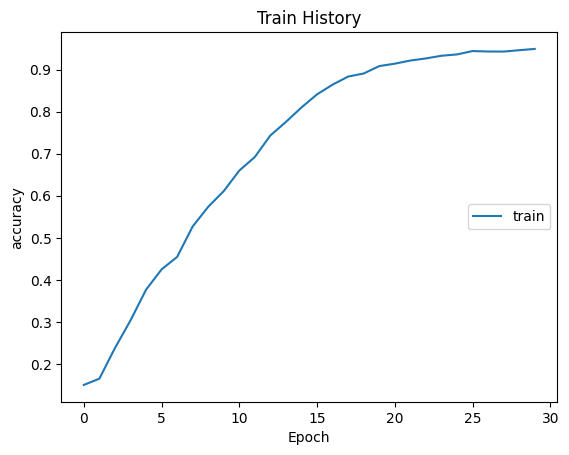

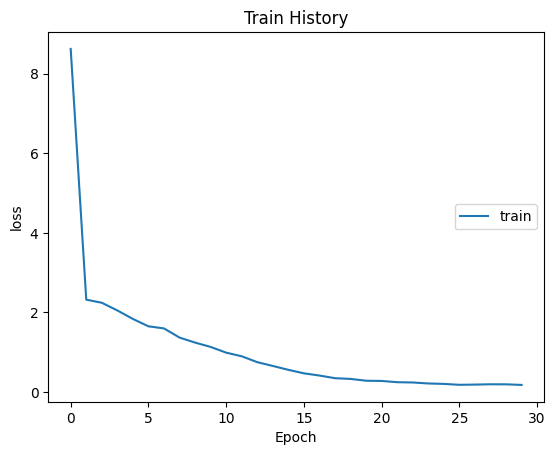

In [23]:
#--------------------------------------------------------套件引入
#繪製正確性與損失歷史圖
import matplotlib.pyplot as plt
import numpy as np
#--------------------------------------------------------建立函數
def show_train_history(train_history, train):
    plt.plot(train_history.history[train])    # 以訓練資料繪圖
    plt.title('Train History')
    plt.ylabel(train)         # 準確度
    plt.xlabel('Epoch')        # 回合數
    plt.legend(['train'], loc='center right') # 標註"訓練資料" 右邊中間
    plt.show()

show_train_history(train_history, 'accuracy') # 準確率
show_train_history(train_history, 'loss')   # 損失

# 7.RNN

In [24]:
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
!wget https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Test.csv

--2023-11-09 11:29:43--  https://github.com/shhuangmust/AI/raw/111-2/Google_Stock_Price_Train.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv [following]
--2023-11-09 11:29:44--  https://raw.githubusercontent.com/shhuangmust/AI/111-2/Google_Stock_Price_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63488 (62K) [text/plain]
Saving to: ‘Google_Stock_Price_Train.csv’

Google_Stock_Price_ 100%[===================>]  62.00K  --.-KB/s    in 0.01s   

2023-11-09 11:29:44 (5.60 MB/s) - ‘Google_Stock_Price_Train.csv’ saved [63488/63488]

--

In [25]:
#--------------------------------------------------------套件引入
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Import the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')  # 讀取訓練集
training_set = dataset_train.iloc[:, 1:2].values  # 取「Open」欄位值

# Feature Scaling

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []   #預測點的前 60 天的資料
y_train = []   #預測點
for i in range(60, 1258):  # 1258 是訓練集總數
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
#--------------------------------------------------------套件引入
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#--------------------------------------------------------模型設定
# Initialising the RNN
regressor = Sequential()                                       # 堆疊
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) # 長短時記憶 記憶單元50 返回輸出true 每一步參數1
regressor.add(Dropout(0.2))                                      # 丟掉20%

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))                    # 長短時記憶 記憶單元50 返回輸出true
regressor.add(Dropout(0.2))                                     # 丟掉20%

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))                    # 長短時記憶 記憶單元50 返回輸出true
regressor.add(Dropout(0.2))                                     # 丟掉20%

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))                                   # 長短時記憶 記憶單元50
regressor.add(Dropout(0.2))                                       # 丟掉20%
# Adding the output layer
regressor.add(Dense(units = 1))                                   # 全連結 記憶單元 1
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')                # 優化器 adam 損失函數 mean_squared_error

# 進行訓練
regressor.fit(X_train, y_train, epochs = 65, batch_size = 32)                 # 模型訓練設定 65回合 每回合使用32個參數

Epoch 1/65
38/38 [==============================] - 9s 16ms/step - loss: 0.0349
Epoch 2/65
38/38 [==============================] - 1s 14ms/step - loss: 0.0065
Epoch 3/65
38/38 [==============================] - 1s 14ms/step - loss: 0.0058
Epoch 4/65
38/38 [==============================] - 1s 15ms/step - loss: 0.0050
Epoch 5/65
38/38 [==============================] - 1s 13ms/step - loss: 0.0060
Epoch 6/65
38/38 [==============================] - 1s 14ms/step - loss: 0.0048
Epoch 7/65
38/38 [==============================] - 1s 17ms/step - loss: 0.0048
Epoch 8/65
38/38 [==============================] - 1s 19ms/step - loss: 0.0046
Epoch 9/65
38/38 [==============================] - 1s 19ms/step - loss: 0.0040
Epoch 10/65
38/38 [==============================] - 1s 16ms/step - loss: 0.0040
Epoch 11/65
38/38 [==============================] - 1s 13ms/step - loss: 0.0044
Epoch 12/65
38/38 [==============================] - 1s 13ms/step - loss: 0.0045
Epoch 13/65
38/38 [==================

In [27]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')               #測試資料歸一化
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling

X_test = []
for i in range(60, 80):  # timesteps一樣60； 80 = 先前的60天資料+2017年的20天資料
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale

1/1 [==============================] - 1s 1s/step


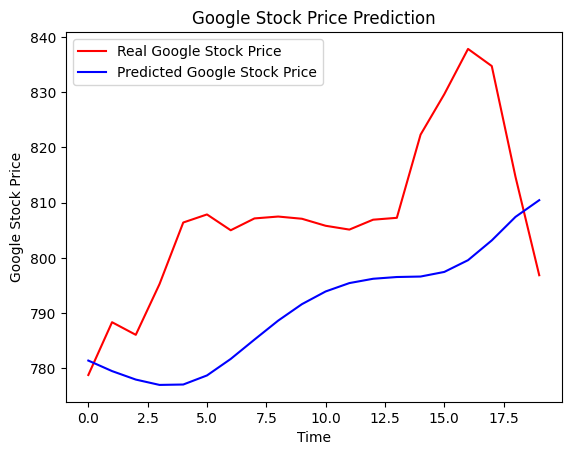

In [28]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  # 紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  # 藍線表示預測股價
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# 8.MNIST_Autoencoder_Denoise

Epoch 1/20
469/469 [==============================] - 5s 7ms/step - loss: 0.2714
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1907
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1744
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1658
Epoch 5/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1601
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1562
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1531
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1504
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1483
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1464
Epoch 11/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1450
Epoch 12/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1438
Epoch 13/20
469/469 [====

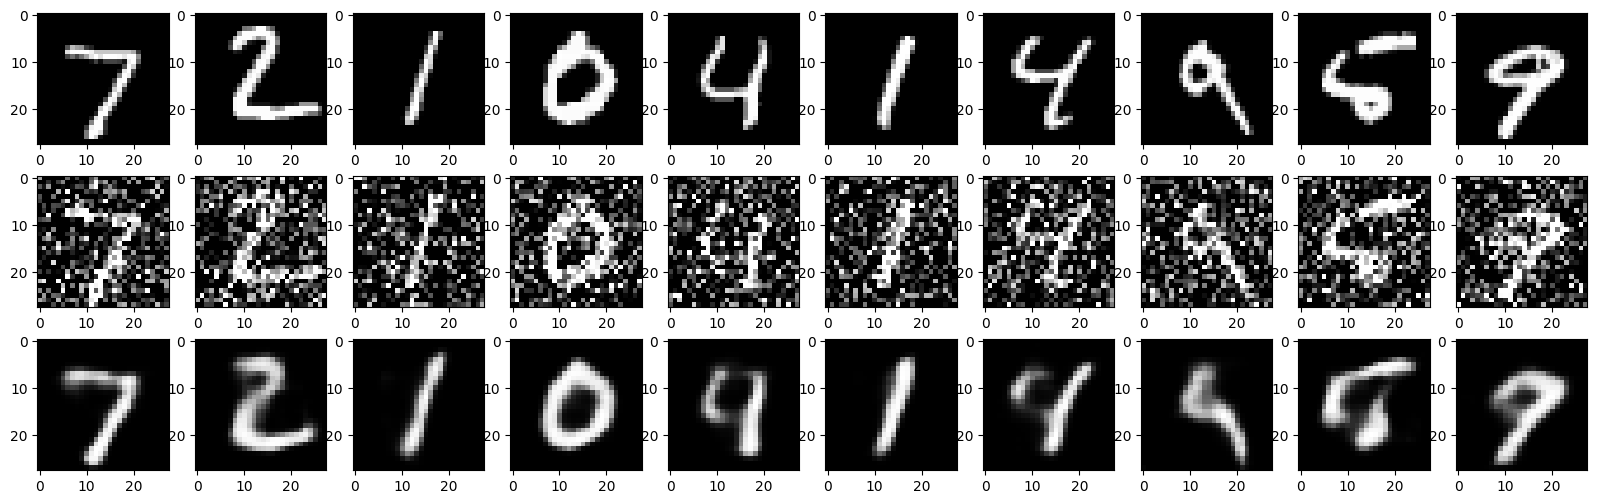

In [29]:
#--------------------------------------------------------套件引入
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.                                #圖片像素通常在0~255之間，所以/255 縮放到0~1之間
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#--------------------------------------------------------------------------------------------------加入雜訊 進行數據增強
noise_factor = 0.5
# numpy.random.normal 函數裡的三個參數分别代表生成的高斯分布的均值、標準差以及輸出的 size
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
#--------------------------------------------------------模型設定
#autoencoder模型建立
autoencoder=Sequential()                                                  # 堆疊
#encoder
autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same')) # 捲積 16過濾器 大小3*3 輸入 28*28 黑白
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))                              # 特徵圖尺寸縮減 2*2 padding填充
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))                # 捲積 8過濾 大小3*3 激活函數relu padding填充
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))                              # 特徵圖尺寸縮減 2*2 padding填充
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))                # 捲積 8過濾 大小3*3 激活函數relu padding填充
autoencoder.add(MaxPooling2D(pool_size=(2, 2), padding='same'))                              # 特徵圖尺寸縮減 2*2 padding填充
#Decoder
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))              # 捲積 8過濾 大小3*3 激活函數relu padding填充
autoencoder.add(UpSampling2D((2, 2)))                                          # 添加採樣器 2h 2w
autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))               # 捲積 8過濾 大小3*3 激活函數relu padding填充
autoencoder.add(UpSampling2D((2, 2)))                                           # 添加採樣器 2h 2w
autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))                        # 捲積 16過濾 大小3*3 激活函數relu padding填充
autoencoder.add(UpSampling2D((2, 2)))                                            # 添加採樣器 2h 2w
autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))                # 捲積 輸出1 大小3*3 激活函數sigmoid padding填充

# 編譯模型，optimizer 使用 adam，loss 使用 binary_crossentropy
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')                               # 優化器 adam 損失函數 binary_crossentropy

# 訓練 Autoencoder ，輸入是加入雜訊的圖片，輸出是原始圖片
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=128)

#將有雜訊的測試影像丟入訓練好的模型進行訓練
denoised_images = autoencoder.predict(x_test_noisy.reshape(x_test_noisy.shape[0], x_test_noisy.shape[1], x_test_noisy.shape[2], 1))

#繪製圖形
plt.figure(figsize=(20, 6))

for i in range(10):
    ax = plt.subplot(3, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax = plt.subplot(3, 10, i+11)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax = plt.subplot(3, 10, i+21)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()

plt.show()